In [10]:
#Getting Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Importing the dataset
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Drop Id Column
data=data.drop("Id",axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Summary of the Dataset
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

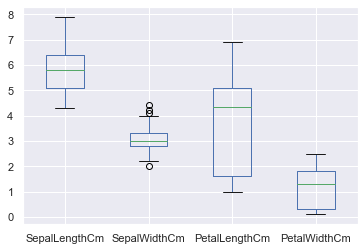

In [11]:
#Visualizations
data.plot(kind="box",sharex=False,sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B83243A48>,
      dtype=object)

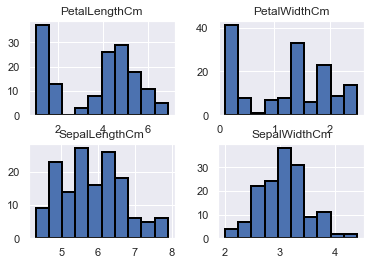

In [13]:
data.hist(edgecolor="black",linewidth=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B83224388>,
      dtype=object)

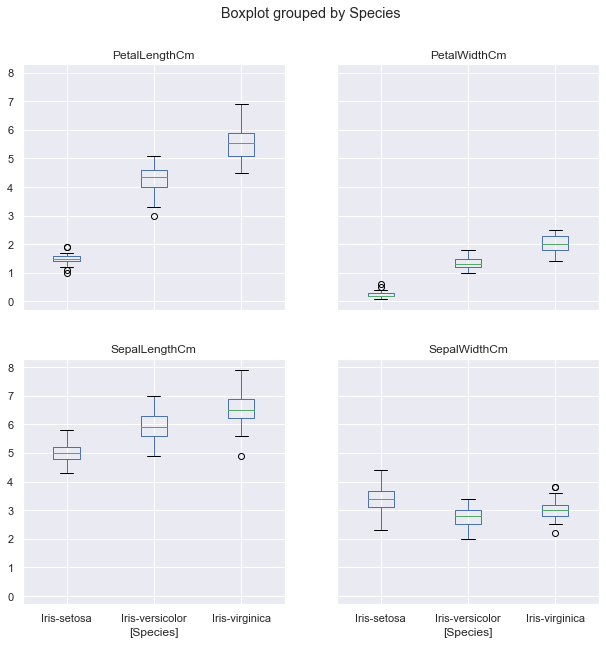

In [14]:
data.boxplot(by="Species",figsize=(10,10))

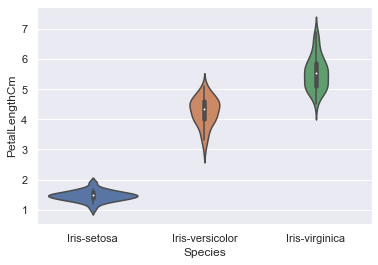

In [15]:
sns.violinplot(data=data,x="Species",y="PetalLengthCm")

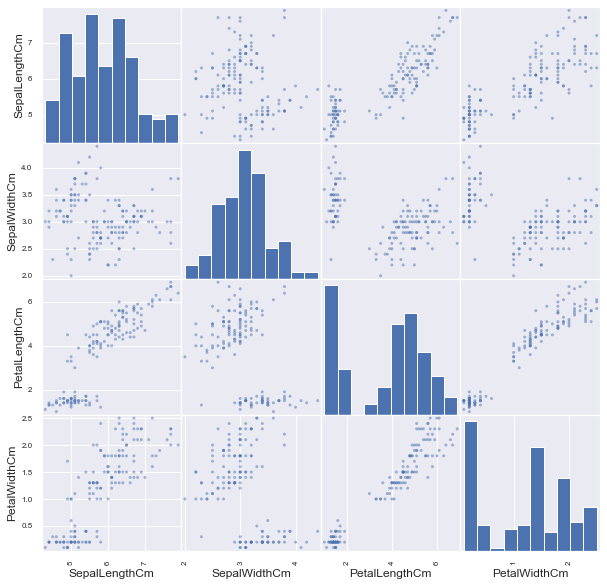

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,10))
plt.show()

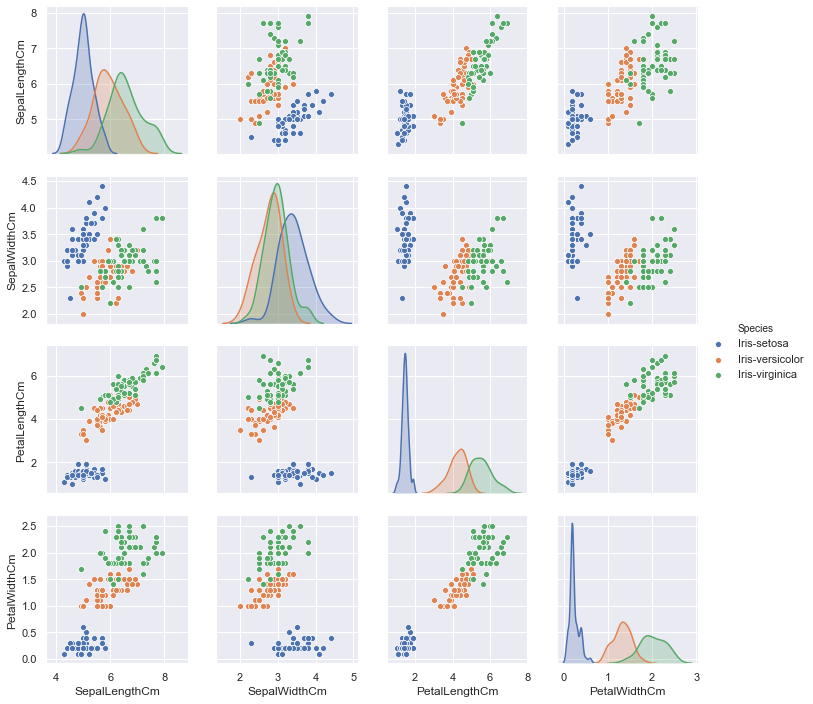

In [18]:
sns.pairplot(data,hue="Species")

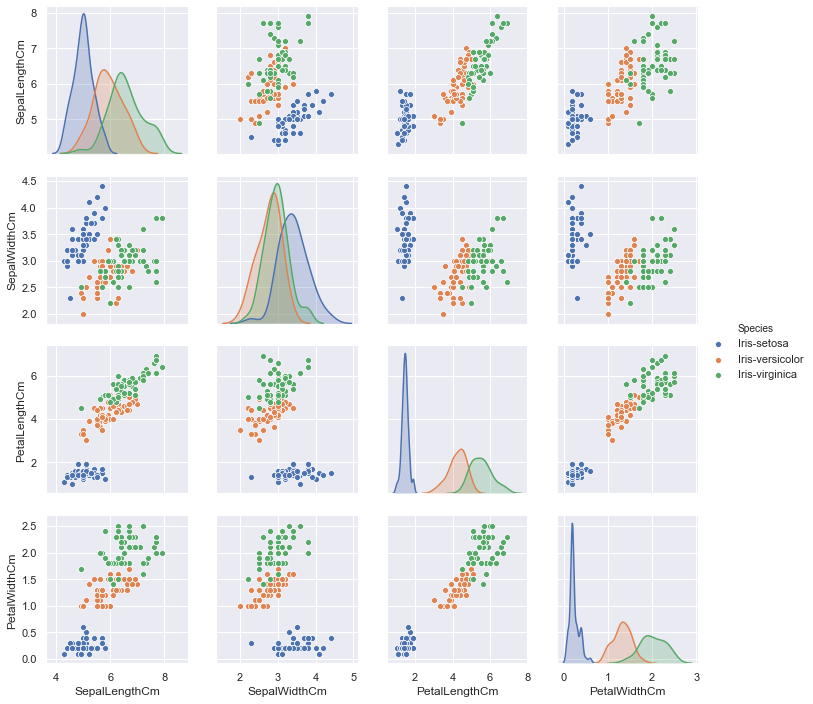

In [19]:
sns.pairplot(data,hue="Species",diag_kind="kde")

In [20]:
#Applying different Classification models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(predictions,y_test))

Accuracy is  0.9666666666666667


In [30]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [32]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(predictions,y_test))

Accuracy is 0.9666666666666667


In [34]:
#Support Vector Machine's(SVM)
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [36]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(predictions,y_test))

Accuracy is 1.0


In [38]:
#K-Nearest Neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(predictions,y_test))

Accuracy is 1.0


In [42]:
#Decision Tree's
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [43]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [44]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(predictions,y_test))

Accuracy is 1.0
